In [6]:
import numpy as np
import pandas as pd

In [292]:
bag = [] 
alphabet = [*'abcdefghijklmnopqrstuvwxyz']
total_num_words = 1000
i = 0


while i < total_num_words:
    word = []

    length = int(6 * np.random.rand())+2
    
    j = 0
    while j < length:
        val = int(26 * np.random.rand())
        flip = np.random.rand()
        if flip < .02:
            word.append("f")
        else:
            word.append(alphabet[val])
        
        j+=1
    
    word = ''.join(word)
    bag.append(word)
    
    i+=1

In [293]:
f = ["index", "word", "letter count"]
[f.append(letter) for letter in alphabet]
print(f)
temp_dataframe = pd.DataFrame(columns=f)
temp_dataframe.keys()

['index', 'word', 'letter count', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Index(['index', 'word', 'letter count', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z'],
      dtype='object')

In [294]:
for i, word in enumerate(bag):
    
    counts = np.zeros(len(alphabet))
    
    row = pd.DataFrame([[i, word, len(*[word]), *counts.astype(int)]], columns=f )
    
    breakdown = np.unique([*word], return_counts = True)
    p = 0
    for l in breakdown[0]:
        row.at[0,l] = breakdown[1][p]
        p+=1
        
    temp_dataframe = pd.concat((temp_dataframe,row))

In [295]:
letter_counts_df = pd.DataFrame(columns = letters)
letter_counts_df
letter_sum = []

for letter in letters:
    letter_sum.append(temp_dataframe[letter].sum())

letter_sum_df = pd.DataFrame([letter_sum], columns = letters)

counts = pd.concat((letter_counts_df, letter_sum_df))
counts

a    b    c    d    e    f    g    h    i    j  ...    q    r    s    t  \
0  189  159  158  185  163  302  185  159  176  178  ...  173  188  157  180   

     u    v    w    x    y    z  
0  194  175  188  158  201  168  

[1 rows x 26 columns]

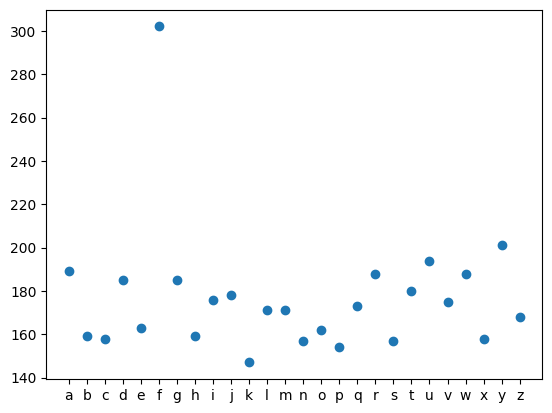

In [296]:
import matplotlib.pyplot as plt    

plt.scatter(np.arange(np.shape(counts)[1]), np.array(counts.iloc[0]))
plt.xticks(ticks = np.arange(np.shape(counts)[1]), labels = letters)
plt.show()

In [297]:
temp_dataframe["letter count"].describe()

count     1000
unique       6
top          7
freq       180
Name: letter count, dtype: int64

In [298]:
np.array(counts.iloc[0])

array([189, 159, 158, 185, 163, 302, 185, 159, 176, 178, 147, 171, 171,
       157, 162, 154, 173, 188, 157, 180, 194, 175, 188, 158, 201, 168],
      dtype=object)

In [262]:
temp_dataframe

index     word letter count  a  b  c  d  e  f  g  ...  q  r  s  t  u  v  w  \
0      0    mduqr            5  0  0  0  1  0  0  0  ...  1  1  0  0  1  0  0   
0      1  jvtaxrk            7  1  0  0  0  0  0  0  ...  0  1  0  1  0  1  0   
0      2      mvx            3  0  0  0  0  0  0  0  ...  0  0  0  0  0  1  0   
0      3   dzvsbv            6  0  1  0  1  0  0  0  ...  0  0  1  0  0  2  0   
0      4      sos            3  0  0  0  0  0  0  0  ...  0  0  2  0  0  0  0   
..   ...      ...          ... .. .. .. .. .. .. ..  ... .. .. .. .. .. .. ..   
0    995      wrw            3  0  0  0  0  0  0  0  ...  0  1  0  0  0  0  2   
0    996   uztwcg            6  0  0  1  0  0  0  1  ...  0  0  0  1  1  0  1   
0    997  zaozpfy            7  1  0  0  0  0  1  0  ...  0  0  0  0  0  0  0   
0    998       pu            2  0  0  0  0  0  0  0  ...  0  0  0  0  1  0  0   
0    999    biwjm            5  0  1  0  0  0  0  0  ...  0  0  0  0  0  0  1   

    x  y  z  
0   0  0  0  
0   1  0  0  
0   1  0  0  
0   0  0  1  
0   0  0  0  
.. .. .. ..  
0   0  0  0  
0   0  0  1  
0   0  1  2  
0   0  0  0  
0   0  0  0  

[1000 rows x 29 columns]